# To Predict the sales based on the advertiment spent on different medium.

# Project Pipeline:

## 1) Understanding the Business case and Domain Analysis.

## Domain analysis
1) TV = Amount Spent on TV Advertisement
2) Radio = Amount Spent on Radio Advertisement
3) Newspaper = Amount Spent on NP Advertisement
4) Sales = Target= Sales of product

In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# 2) Basic checks and EDA

In [ ]:
data.tail()

In [7]:
data.describe() #Statistical analysis of numerical data

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
data.info()
# No Null values present.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# EDA

In [ ]:
data.head()

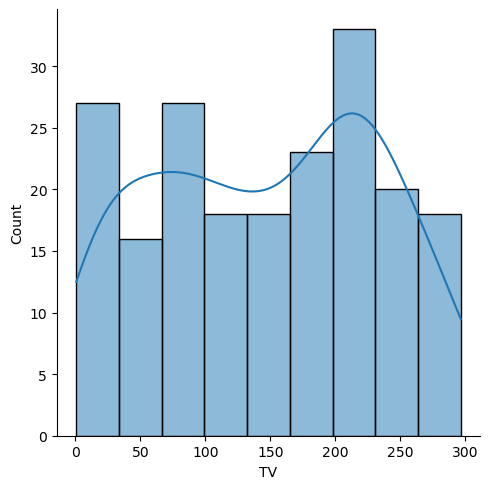

In [11]:
# Univariate analysis
import seaborn as sns
sns.displot(x=data["TV"],kde=True)

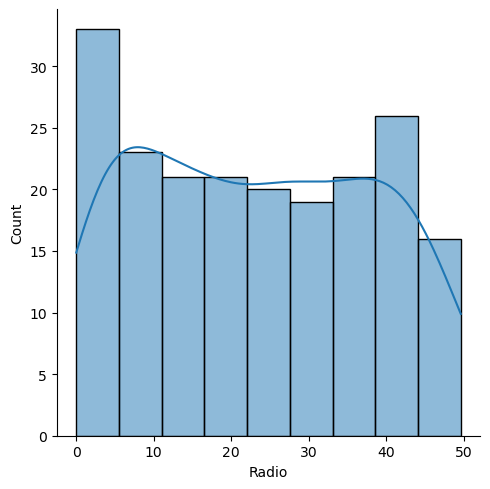

In [13]:
sns.displot(x=data["Radio"],kde=True)

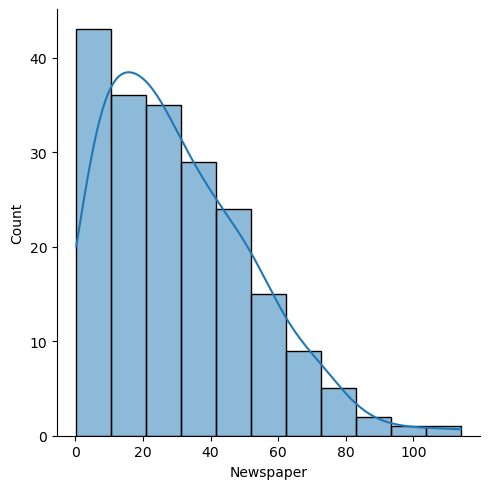

In [15]:
sns.displot(x=data['Newspaper'],kde=True)

<Axes: xlabel='TV', ylabel='Sales'>

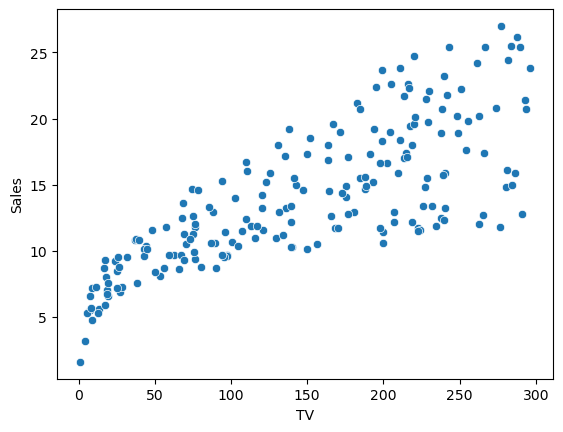

In [17]:
# Bivariate analysis
sns.scatterplot(x='TV',y='Sales',data=data)

<Axes: xlabel='Radio', ylabel='Sales'>

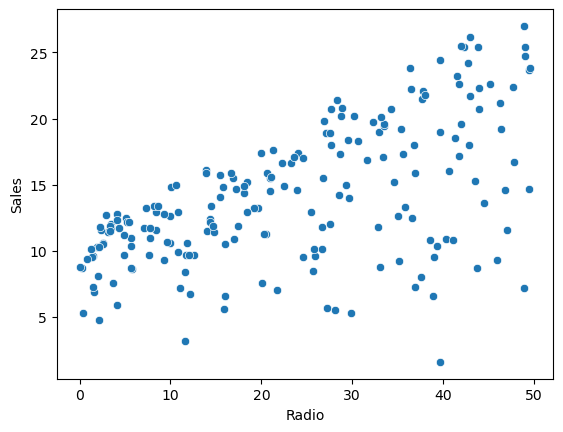

In [19]:
sns.scatterplot(x='Radio',y='Sales',data=data)

<Axes: xlabel='Newspaper', ylabel='Sales'>

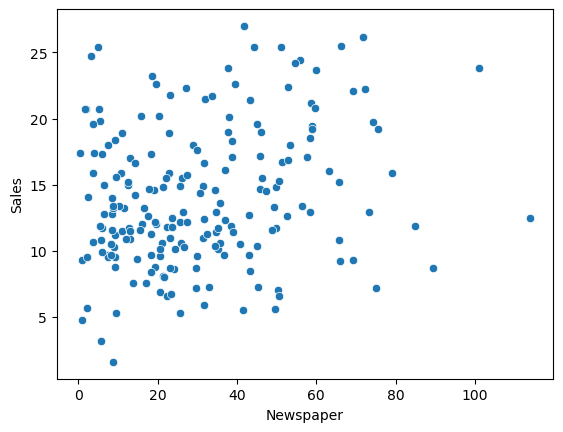

In [21]:
sns.scatterplot(x='Newspaper',y='Sales',data=data)

In [ ]:
data.columns

In [ ]:
# Multi variate analysis
data1=data.drop('Unnamed: 0',axis=1)
sns.pairplot(data1)

# 3) Data PreProceesing

In [25]:
# 1)Handle Missing values
data1.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
# 2) Handling categorical data
data.info()

<Axes: xlabel='TV'>

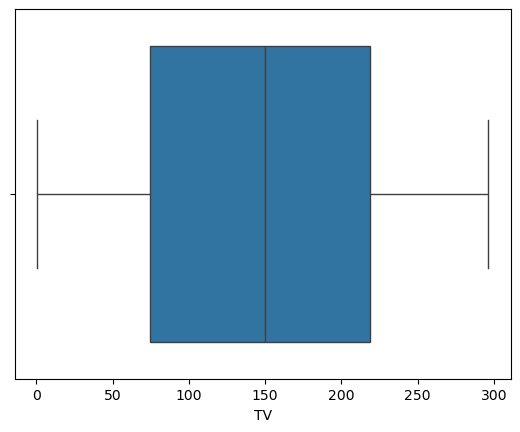

In [27]:
# 3)Handling Outliers 
sns.boxplot(x=data1['TV'])

<Axes: xlabel='Radio'>

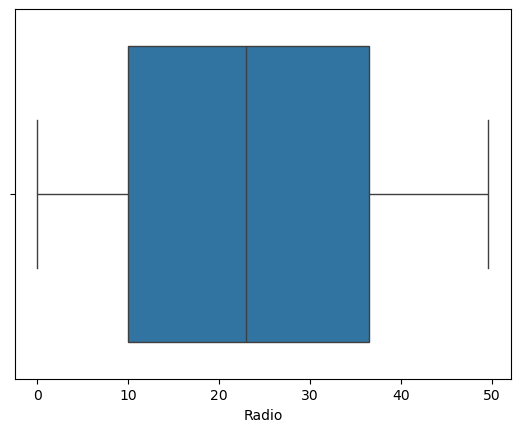

In [29]:
sns.boxplot(x=data1['Radio'])

<Axes: xlabel='Newspaper'>

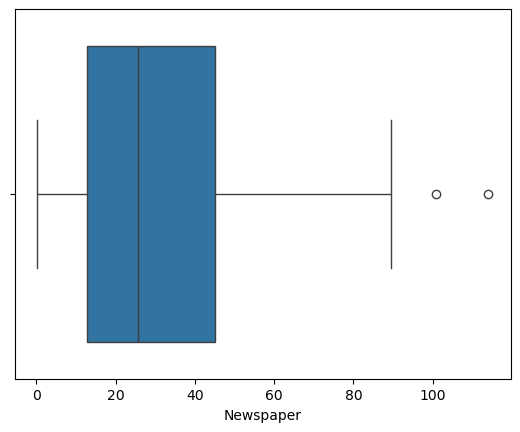

In [31]:
sns.boxplot(x=data1['Newspaper'])

In [33]:
data1.loc[data1['Newspaper']>90,'Newspaper']=np.median(data1['Newspaper'])

<Axes: xlabel='Newspaper'>

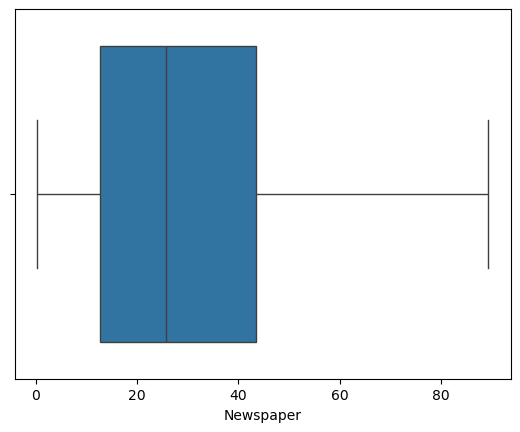

In [35]:
sns.boxplot(x=data1['Newspaper'])

In [ ]:
# Saling
# Balancing 

## 4) Feature Selection
- Drop unwanted Features
- Check for multicollinearity

In [37]:
data.head(2)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


In [41]:
data2=data.drop('Unnamed: 0',axis=1)
data2

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
data2.corr()

<Axes: >

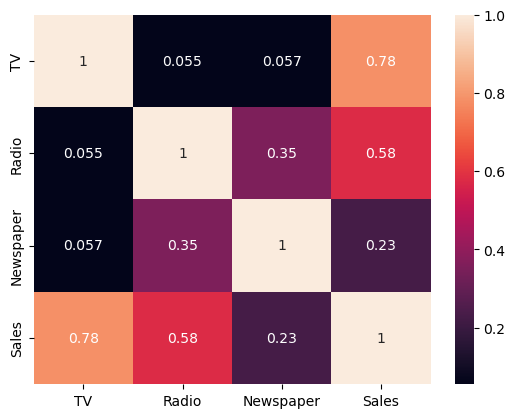

In [43]:
# Heat Map
sns.heatmap(data2.corr(),annot=True)

# 5) Model Creation

In [ ]:
# 1)Split the data into independent and dependent variables

In [45]:
x= data1[['TV','Newspaper','Radio']]
y= data1['Sales']

In [47]:
# 2)Creating Training and Testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [49]:
x_train.shape

(160, 3)

In [51]:
x_test.shape

(40, 3)

In [53]:
# Create model
from sklearn.linear_model import LinearRegression
LR=LinearRegression() # Object Creation

LR.fit(x_train,y_train) # Model Training
y_pred=LR.predict(x_test) #model Prediction

# Model Evaluation

In [55]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [57]:
mean_squared_error(y_pred,y_test)

3.1796338952244407

In [59]:
mean_absolute_error(y_pred,y_test)

1.3689892204811804

In [61]:
r2_score(y_pred,y_test)

0.8838427005547848

# Adjusted R2 Score
- Takes no. of input variables into account

In [71]:
adj_r2= 1-((1-0.88)*(40-1)/(40-3-1))
adj_r2

0.87

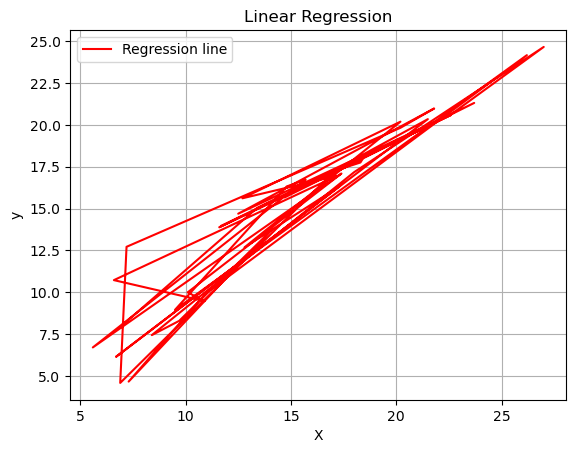

In [69]:
import matplotlib.pyplot as plt

# Plot the original data
#plt.scatter(X, y, label='Data points')

# Plot the regression line
plt.plot(y_test, y_pred, color='red', label='Regression line')

# Add labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()

# Show plot
plt.grid(True)
plt.show()
